<a href="https://colab.research.google.com/github/jpatra85/ColabTF_EDU/blob/master/Loan%20Prediction_Selected%20_Features_Not%20Overfitted.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
!ls "/content/drive/My Drive/df_ft_out.csv"

'/content/drive/My Drive/df_ft_out.csv'


In [0]:
# All features
#import pandas as pd
#df = pd.read_csv('/content/drive/My Drive/df_ft_out_all_ft.csv')
#df.drop('Unnamed: 0',axis = 1, inplace = True)

In [0]:
# Selective features
import pandas as pd
df = pd.read_csv('/content/drive/My Drive/df_ft_out.csv')

In [0]:
import pandas
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler

In [136]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow_docs as tfdocs
import tensorflow_docs.plots
import tensorflow_docs.modeling
print(tf.__version__)


2.2.0


In [137]:
train_dataset = df.sample(frac=0.8,random_state=0)
test_dataset = df.drop(train_dataset.index)

train_stats = train_dataset.describe()
train_stats.pop('loan_amount')
train_stats = train_stats.transpose()
train_stats

train_labels = train_dataset.pop('loan_amount')
test_labels = test_dataset.pop('loan_amount')

train_dataset.head()


,home_ownership,sanitary_availability,col_F,col_M,col_TG,col_type_of_house0,col_type_of_houseR,col_type_of_houseT1,col_type_of_houseT2,col_water_availabity0.0,col_water_availabity0.5,col_water_availabity1.0,col_primary_business0,col_primary_business1,col_primary_business2,col_primary_business3,col_primary_business4,col_loan_purpose0,col_loan_purpose1,col_loan_purpose2,col_loan_purpose3,col_income_group0,col_income_group1,col_income_group2,col_income_group3,col_income_group4,col_monthly_expense0,col_monthly_expense1,col_monthly_expense2,col_monthly_expense3,col_monthly_expense4,col_occupants_grounps0,col_occupants_grounps1,col_occupants_grounps2,col_occupants_grounps3,col_house_area_group0,col_house_area_group1,col_house_area_group2,col_house_area_group3,col_loan_installment_group0,col_loan_installment_group1,col_loan_installment_group2,col_loan_tenure_group0,col_loan_tenure_group1,col_loan_tenure_group2,col_loan_tenure_group3,annual_income,monthly_expenses,old_dependents,young_dependents,occupants_count,house_area
4914,1,1,1,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,18000,3500,0,1,2.0,800
393,1,1,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,35000,3200,0,0,2.0,112
6103,1,1,1,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,3000,1500,0,1,4.0,700
15459,1,1,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,24000,3900,0,1,3.0,400
4225,1,1,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,12000,3500,0,1,3.0,250


In [0]:
def norm(x):
  return (x - train_stats['mean']) / train_stats['std']
  
normed_train_data = norm(train_dataset)
normed_test_data = norm(test_dataset)



In [139]:
print(df.isnull().sum().sum())
print(normed_train_data.isnull().sum().sum())
print(normed_test_data.isnull().sum().sum())
normed_train_data.head()

0
0
0


,home_ownership,sanitary_availability,col_F,col_M,col_TG,col_type_of_house0,col_type_of_houseR,col_type_of_houseT1,col_type_of_houseT2,col_water_availabity0.0,col_water_availabity0.5,col_water_availabity1.0,col_primary_business0,col_primary_business1,col_primary_business2,col_primary_business3,col_primary_business4,col_loan_purpose0,col_loan_purpose1,col_loan_purpose2,col_loan_purpose3,col_income_group0,col_income_group1,col_income_group2,col_income_group3,col_income_group4,col_monthly_expense0,col_monthly_expense1,col_monthly_expense2,col_monthly_expense3,col_monthly_expense4,col_occupants_grounps0,col_occupants_grounps1,col_occupants_grounps2,col_occupants_grounps3,col_house_area_group0,col_house_area_group1,col_house_area_group2,col_house_area_group3,col_loan_installment_group0,col_loan_installment_group1,col_loan_installment_group2,col_loan_tenure_group0,col_loan_tenure_group1,col_loan_tenure_group2,col_loan_tenure_group3,annual_income,monthly_expenses,old_dependents,young_dependents,occupants_count,house_area
4914,0.163464,0.671033,0.250247,-0.249885,-0.012652,-0.1136,-0.433979,-0.783910,1.109687,-0.381284,1.163229,-0.901068,-0.040438,0.839818,-0.826913,-0.061314,-0.046013,-0.451049,-0.443163,0.892064,-0.351431,2.203687,-0.564747,-0.72132,-0.243607,-0.242721,-0.068288,-0.187322,2.561927,-0.789028,-0.673442,-0.373812,1.517248,-1.146547,-0.081475,-0.847769,1.254908,-0.264113,-0.085745,0.596691,-0.590872,-0.061314,-0.102374,0.612686,-0.077603,-0.587421,-0.764466,0.020629,-0.205857,0.371403,-0.487889,0.532938
393,0.163464,0.671033,0.250247,-0.249885,-0.012652,-0.1136,-0.433979,1.275617,-0.901126,-0.381284,1.163229,-0.901068,-0.040438,0.839818,-0.826913,-0.061314,-0.046013,2.216982,-0.443163,-1.120960,-0.351431,-0.453770,1.770647,-0.72132,-0.243607,-0.242721,-0.068288,-0.187322,-0.390319,1.267342,-0.673442,-0.373812,1.517248,-1.146547,-0.081475,1.179529,-0.796846,-0.264113,-0.085745,0.596691,-0.590872,-0.061314,-0.102374,0.612686,-0.077603,-0.587421,-0.102067,-0.208233,-0.205857,-1.118503,-0.487889,-0.708268
6103,0.163464,0.671033,0.250247,-0.249885,-0.012652,-0.1136,-0.433979,-0.783910,1.109687,-0.381284,1.163229,-0.901068,-0.040438,0.839818,-0.826913,-0.061314,-0.046013,2.216982,-0.443163,-1.120960,-0.351431,2.203687,-0.564747,-0.72132,-0.243607,-0.242721,14.643347,-0.187322,-0.390319,-0.789028,-0.673442,-0.373812,-0.659067,0.872156,-0.081475,-0.847769,1.254908,-0.264113,-0.085745,0.596691,-0.590872,-0.061314,-0.102374,0.612686,-0.077603,-0.587421,-1.348935,-1.505113,-0.205857,0.371403,0.803072,0.352530
15459,0.163464,0.671033,0.250247,-0.249885,-0.012652,-0.1136,-0.433979,1.275617,-0.901126,-0.381284,-0.859648,1.109759,-0.040438,0.839818,-0.826913,-0.061314,-0.046013,-0.451049,2.256433,-1.120960,-0.351431,-0.453770,1.770647,-0.72132,-0.243607,-0.242721,-0.068288,-0.187322,-0.390319,1.267342,-0.673442,-0.373812,-0.659067,0.872156,-0.081475,1.179529,-0.796846,-0.264113,-0.085745,-1.675856,1.692361,-0.061314,-0.102374,-1.632105,-0.077603,1.702303,-0.530678,0.325777,-0.205857,0.371403,0.157591,-0.188693
4225,0.163464,0.671033,0.250247,-0.249885,-0.012652,-0.1136,-0.433979,1.275617,-0.901126,-0.381284,1.163229,-0.901068,-0.040438,-1.190696,1.209278,-0.061314,-0.046013,-0.451049,-0.443163,0.892064,-0.351431,2.203687,-0.564747,-0.72132,-0.243607,-0.242721,-0.068288,-0.187322,2.561927,-0.789028,-0.673442,-0.373812,-0.659067,0.872156,-0.081475,1.179529,-0.796846,-0.264113,-0.085745,-1.675856,1.692361,-0.061314,-0.102374,-1.632105,-0.077603,1.702303,-0.998253,0.020629,-0.205857,0.371403,0.157591,-0.459305


In [0]:
def build_model():
  model = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=[len(train_dataset.keys())]),
    layers.Dense(128, activation='relu', kernel_regularizer='l2'),
    layers.Dropout(0.3),
    layers.Dense(128, activation='relu', kernel_regularizer='l2'),
    layers.Dropout(0.3),
    layers.Dense(64, activation='relu', kernel_regularizer='l2'),
    layers.Dropout(0.2),
    layers.Dense(1)
  ])

  optimizer = tf.keras.optimizers.RMSprop(0.001)

  model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mape', 'mse'])
  return model

In [141]:
model = build_model()
model.summary()


Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_40 (Dense)             (None, 128)               6784      
_________________________________________________________________
dense_41 (Dense)             (None, 128)               16512     
_________________________________________________________________
dropout_24 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_42 (Dense)             (None, 128)               16512     
_________________________________________________________________
dropout_25 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_43 (Dense)             (None, 64)                8256      
_________________________________________________________________
dropout_26 (Dropout)         (None, 64)               

In [143]:
history = model.fit(normed_train_data, train_labels,
  epochs= 125,batch_size = 128 , validation_split = 0.25)

Epoch 1/125
184/184 [==============================] - 1s 4ms/step - loss: 104191624.0000 - mape: 22.8312 - mse: 104191584.0000 - val_loss: 60641492.0000 - val_mape: 22.9038 - val_mse: 60641456.0000
Epoch 2/125
184/184 [==============================] - 1s 4ms/step - loss: 106846776.0000 - mape: 22.7104 - mse: 106846744.0000 - val_loss: 58469480.0000 - val_mape: 21.3587 - val_mse: 58469436.0000
Epoch 3/125
184/184 [==============================] - 1s 4ms/step - loss: 103166736.0000 - mape: 23.0275 - mse: 103166664.0000 - val_loss: 60144028.0000 - val_mape: 20.6692 - val_mse: 60143984.0000
Epoch 4/125
184/184 [==============================] - 1s 4ms/step - loss: 105349504.0000 - mape: 22.9477 - mse: 105349448.0000 - val_loss: 59888980.0000 - val_mape: 21.2482 - val_mse: 59888944.0000
Epoch 5/125
184/184 [==============================] - 1s 4ms/step - loss: 108790376.0000 - mape: 22.7897 - mse: 108790320.0000 - val_loss: 63065644.0000 - val_mape: 22.7073 - val_mse: 63065616.0000
Epoch

In [144]:
test_predictions = model.predict(normed_test_data).flatten()
test_predictions.max()

802728.0

In [145]:
test_mape = (100*abs(test_labels.values - test_predictions)/test_labels.values).mean()
print("test_mape: ", test_mape)

test_mape:  20.922440719440168


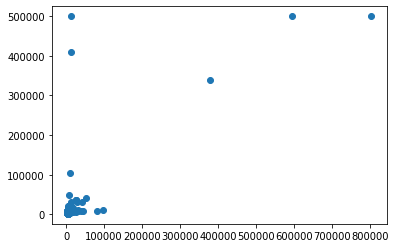

In [146]:
import matplotlib.pyplot as plt
plt.scatter(test_predictions,test_labels)

8938842.055175781

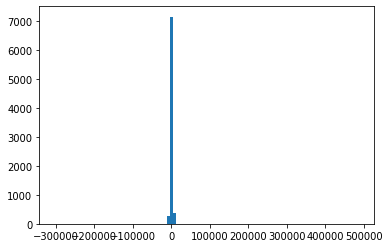

In [147]:
import matplotlib.pyplot as plt
plt.hist((test_labels.values - test_predictions), bins = 100)
(test_labels.values - test_predictions).mean()
(test_labels.values - test_predictions).sum()